# Mini-Projet IA : Prédiction du Revenu Annuel d'un Marocain

*Auteurs du notebook (et potentiellement du projet) :*

  -Hala QUERRICH

  -Jihane ELAMRANI

  -Zakaria AYAD .


*Date de présentation prévue :* SAMEDI 17 Mai 2025

##Objectifs

Ce projet vise à développer un système de Machine Learning de bout en bout pour prédire le revenu annuel d'individus au Maroc. L'objectif principal est de simuler un cas d'usage réel, depuis la génération de données synthétiques jusqu'au déploiement d'un modèle prédictif via une application web.

***Partie 1 : Importation des librairies***

Dans cette partie, nous importons toutes les librairies nécessaires pour le projet, notamment pour la manipulation des données, la visualisation, l'exploration automatique, le machine learning, l'évaluation des modèles et la sauvegarde des résultats.

In [ ]:
!pip install numpy==1.23.5

In [4]:
!pip install sweetviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 89.1 MB/s eta 0:00:00


In [5]:

from sklearn.pipeline import Pipeline
# Manipulation de données

import numpy as np
import pandas as pd

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Exploration automatique
import sweetviz as sv
# ou : from ydata_profiling import ProfileReport si tu utilises ydata-profiling

# Machine learning
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Modèles
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor

# Évaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Sauvegarde du modèle
import joblib


***Partie 2 : Charger et afficher ton dataset***

Nous chargeons le dataset dataset_revenu_marocains.csv et affichons un aperçu des 10 premières instances pour comprendre sa structure.

In [7]:
from google.colab import files
uploaded = files.upload()


Saving dataset_revenu_marocains.csv to dataset_revenu_marocains.csv


In [8]:
import pandas as pd
# Charger les données
df = pd.read_csv('dataset_revenu_marocains.csv')

# Aperçu
df.head(10)


,Age,Sexe,Lieu,Niveau_Education,Experience_Annees,Etat_Matrimonial,Biens_Possedes,Categorie_Socioprofessionnelle,Nombre_Enfants,Acces_Internet,Type_Transport,Revenu_Annuel,Redondance_Transport,Identifiant_Aleatoire
0,56,Femme,Urbain,Superieur,32,Celibataire,Voiture,Artisans / Ouvriers qualifies,3,Non,Transport en commun,23404.069434,Véhicule partagé,204754
1,36,Homme,Rural,Fondamental,13,Veuf,Aucun,Agriculteurs / Pecheurs,2,Non,Transport en commun,9712.388157,Véhicule partagé,153729
2,28,Homme,Rural,Sans niveau,10,Celibataire,NaN,Manoeuvres / Chomeurs,4,Non,Voiture,7252.063650,Véhicule personnel,620847
3,39,Homme,Rural,Superieur,21,Marie,Terrain,Artisans / Ouvriers qualifies,4,Oui,Marche,22247.552207,Aucun véhicule,387743
4,19,Femme,Rural,NaN,0,Marie,Aucun,Agriculteurs / Pecheurs,3,Oui,Marche,8101.779383,Aucun véhicule,699717
5,59,Homme,Urbain,Secondaire,37,Marie,Maison et Terrain,Manoeuvres / Chomeurs,3,Non,Transport en commun,24059.011768,Véhicule partagé,378496
6,33,Femme,Urbain,Superieur,9,Marie,Voiture et Maison,Agriculteurs / Pecheurs,5,Non,Voiture,25568.361814,Véhicule personnel,201620
7,61,Femme,Rural,Secondaire,39,Divorce,Terrain,Inactifs,3,Non,Voiture,78153.998944,Véhicule personnel,935319
8,20,Femme,Urbain,Superieur,0,Divorce,Maison et Terrain,Inactifs,4,Oui,Marche,16704.627215,Aucun véhicule,845016
9,56,Homme,Urbain,Sans niveau,31,Divorce,Terrain,Agriculteurs / Pecheurs,1,Non,Voiture,24125.038431,Véhicule personnel,180039


***Observations :***

Le dataset contient des colonnes comme Age, Sexe, Lieu, Niveau_Education, Experience_Annees, etc., ainsi que la variable cible Revenu_Annuel. Nous remarquons également la présence de valeurs manquantes (NaN) et d'une colonne Identifiant_Aleatoire qui semble être non pertinente pour la prédiction.

***Partie 3 : Résumé des données***

Nous analysons les dimensions, les types de données et les statistiques descriptives pour mieux comprendre le dataset.

In [9]:
# Afficher le nombre total d'instances (lignes)
volume = len(df)
print("Nombre total d'instances :", volume)

# Dimensions du dataset
print("Dimensions du dataset :", df.shape)


Nombre total d'instances : 40000
Dimensions du dataset : (40000, 14)


In [10]:
# Types des colonnes
print("\nTypes des données :")
print(df.dtypes)


Types des données :
Age                                 int64
Sexe                               object
Lieu                               object
Niveau_Education                   object
Experience_Annees                   int64
Etat_Matrimonial                   object
Biens_Possedes                     object
Categorie_Socioprofessionnelle     object
Nombre_Enfants                      int64
Acces_Internet                     object
Type_Transport                     object
Revenu_Annuel                     float64
Redondance_Transport               object
Identifiant_Aleatoire               int64
dtype: object


In [11]:
# Statistiques descriptives
print("\nStatistiques descriptives :")
print(df.describe(include='all'))


Statistiques descriptives :
                 Age   Sexe    Lieu Niveau_Education  Experience_Annees  \
count   40000.000000  40000   40000            38000       40000.000000   
unique           NaN      2       2                4                NaN   
top              NaN  Homme  Urbain        Superieur                NaN   
freq             NaN  20097   20000             9648                NaN   
mean       43.925250    NaN     NaN              NaN          22.630525   
std        15.318953    NaN     NaN              NaN          15.163555   
min        18.000000    NaN     NaN              NaN           0.000000   
25%        31.000000    NaN     NaN              NaN           9.000000   
50%        44.000000    NaN     NaN              NaN          22.000000   
75%        57.000000    NaN     NaN              NaN          36.000000   
max        70.000000    NaN     NaN              NaN          52.000000   

       Etat_Matrimonial Biens_Possedes Categorie_Socioprofessionnelle 

**Justification :**

Ces graphiques permettent d'obtenir une vue d’ensemble claire sur la structure des données :

- L’histogramme de l’âge aide à détecter les distributions anormales ou biaisées.

- Le diagramme de barres du sexe révèle les déséquilibres potentiels.

- Le boxplot du revenu par niveau d’éducation donne un aperçu de l’impact de la scolarité.

- La matrice de corrélation aide à identifier les relations significatives entre variables numériques.

Cette analyse visuelle est une étape cruciale avant d’entraîner un modèle de machine learning.


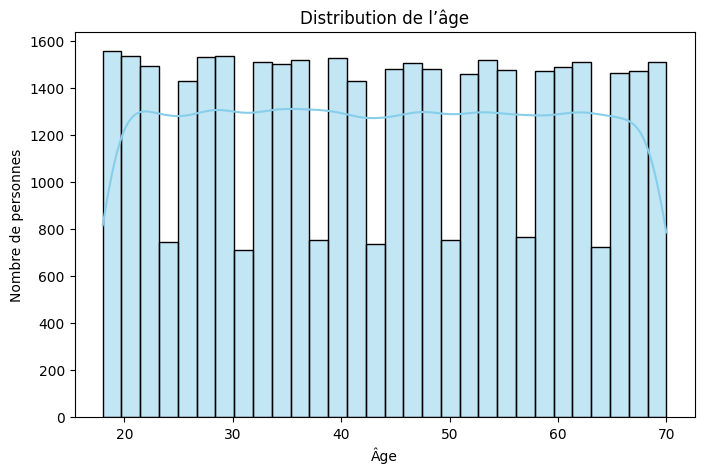

In [17]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='Age', bins=30, kde=True, color='skyblue')
plt.title('Distribution de l’âge')
plt.xlabel('Âge')
plt.ylabel('Nombre de personnes')
plt.show()


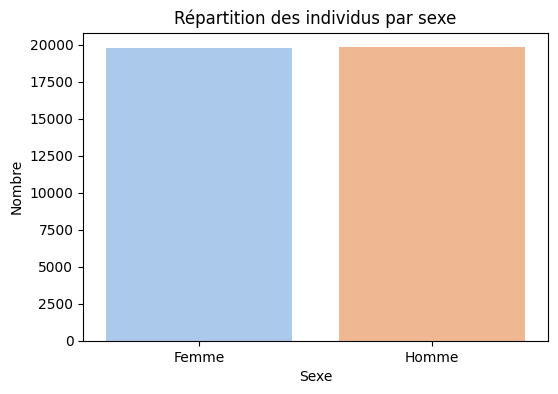

In [20]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Sexe', hue='Sexe', palette='pastel', legend=False)
plt.title('Répartition des individus par sexe')
plt.xlabel('Sexe')
plt.ylabel('Nombre')
plt.show()


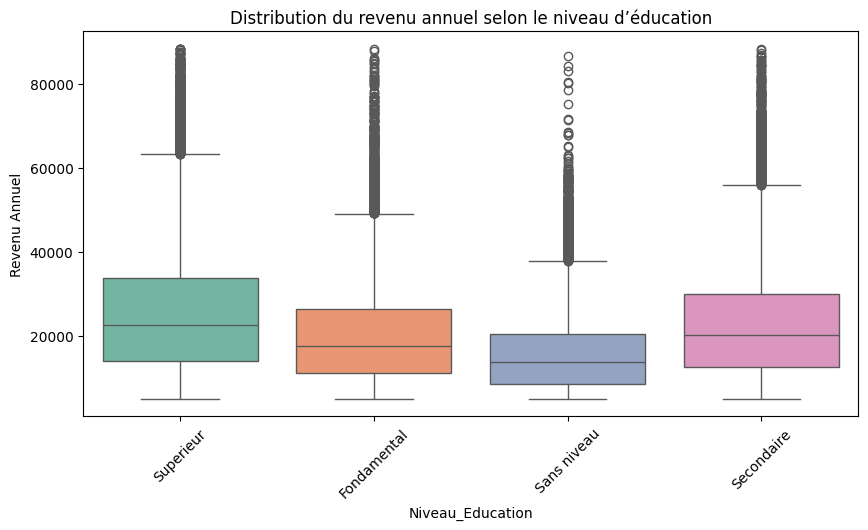

In [21]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Niveau_Education', y='Revenu_Annuel', hue='Niveau_Education', palette='Set2', dodge=False, legend=False)
plt.title('Distribution du revenu annuel selon le niveau d’éducation')
plt.xticks(rotation=45)
plt.ylabel('Revenu Annuel')
plt.show()



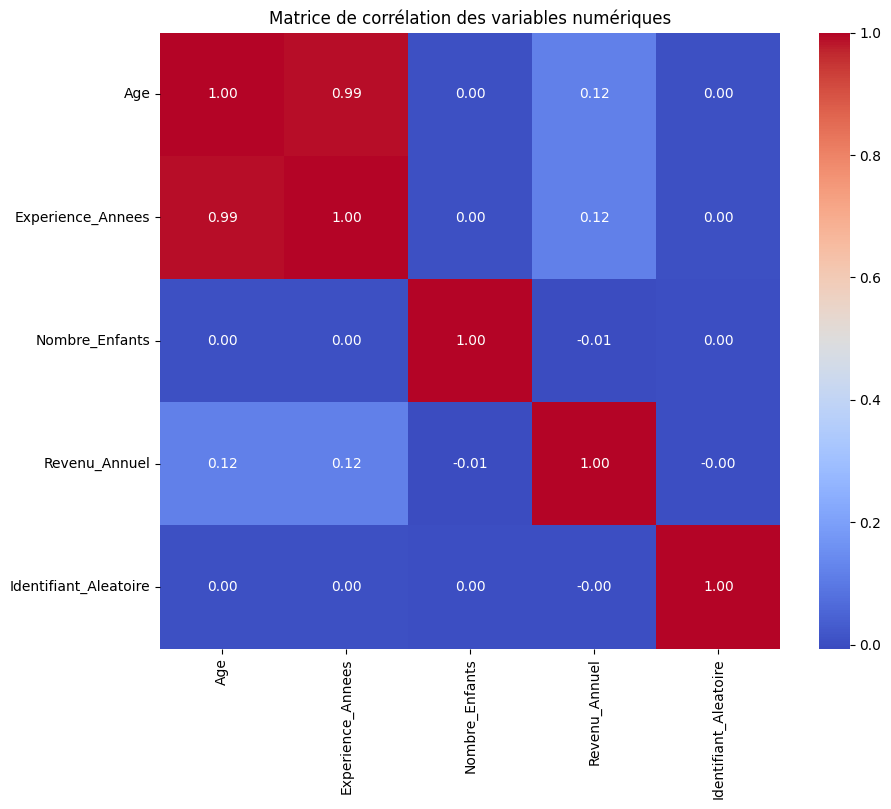

In [23]:
plt.figure(figsize=(10, 8))
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de corrélation des variables numériques')
plt.show()


***Partie 4 : Analyse automatique du dataset***

Nous utilisons Sweetviz pour générer un rapport d'analyse automatique, ce qui nous permet d'identifier rapidement les corrélations, les valeurs manquantes et les distributions des variables.

In [ ]:

import warnings
import numpy as np
import sweetviz as sv
# Analyse Sweetviz
# Ignore VisibleDeprecationWarning using warnings.filterwarnings
with warnings.catch_warnings():
    # Use builtins.VisibleDeprecationWarning instead of np.VisibleDeprecationWarning
    warnings.filterwarnings('ignore', category=DeprecationWarning)
    # Changed to FutureWarning
    warnings.filterwarnings('ignore', category=FutureWarning)
    df = pd.read_csv('dataset_revenu_marocains.csv')

    rapport = sv.analyze(df)
rapport.show_html('rapport_AI_analyse.html')

                                             |          | [  0%]   00:00 -> (? left)

Report rapport_AI_analyse.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


Le rapport généré (rapport_AI_analyse.html) permet de visualiser les distributions, les valeurs manquantes et les relations entre les variables.

***Partie 5 : Nettoyage des données***

**5.1 - Suppression des doublons**

-Objectif : Éviter que des enregistrements identiques biaisent l'entraînement du modèle.

-Méthode : df.drop_duplicates() supprime les lignes dupliquées.

-Pourquoi :

   +Les doublons peuvent fausser les statistiques (ex: moyenne du revenu).
   
   +Risque de surapprentissage si le modèle "mémorise" des données répétées.

In [12]:
print(f"Doublons avant suppression: {df.duplicated().sum()}")
df = df.drop_duplicates()
print(f"Doublons après suppression: {df.duplicated().sum()}")

Doublons avant suppression: 0
Doublons après suppression: 0


**5.2 - Gérer les valeurs manquantes**

-Colonnes ciblées : Niveau_Education, Etat_Matrimonial, Biens_Possedes (catégorielles).


  

In [13]:

print("\nValeurs manquantes avant traitement:")
print(df.isnull().sum())

for col in ['Niveau_Education', 'Etat_Matrimonial', 'Biens_Possedes']:
    mode_val = df[col].mode()[0]
    df[col] = df[col].fillna(mode_val)
    print(f"Colonne {col} remplie avec le mode: {mode_val}")

print("\nValeurs manquantes après traitement:")
print(df.isnull().sum())



Valeurs manquantes avant traitement:
Age                                  0
Sexe                                 0
Lieu                                 0
Niveau_Education                  2000
Experience_Annees                    0
Etat_Matrimonial                  2000
Biens_Possedes                    2000
Categorie_Socioprofessionnelle       0
Nombre_Enfants                       0
Acces_Internet                       0
Type_Transport                       0
Revenu_Annuel                        0
Redondance_Transport                 0
Identifiant_Aleatoire                0
dtype: int64
Colonne Niveau_Education remplie avec le mode: Superieur
Colonne Etat_Matrimonial remplie avec le mode: Divorce
Colonne Biens_Possedes remplie avec le mode: Maison

Valeurs manquantes après traitement:
Age                               0
Sexe                              0
Lieu                              0
Niveau_Education                  0
Experience_Annees                 0
Etat_Matrimonial     

**5.3 - Gérer les valeurs aberrantes**

-Cible : Revenu_Annuel supérieur au 99e percentile.

-Méthode : df[df['Revenu_Annuel'] < revenu_99].

nettoie les données en éliminant les très hauts revenus considérés comme des valeurs aberrantes, ce qui permet d’éviter que ces valeurs extrêmes biaisent les analyses statistiques ou les modèles prédictifs

In [14]:
revenu_99 = df['Revenu_Annuel'].quantile(0.99)
print(f"\nSeuil pour les valeurs aberrantes (99e percentile): {revenu_99:.2f}")

print(f"Nombre de valeurs aberrantes avant traitement: {len(df[df['Revenu_Annuel'] > revenu_99])}")
df = df[df['Revenu_Annuel'] < revenu_99]
print(f"Nombre de valeurs aberrantes après traitement: {len(df[df['Revenu_Annuel'] > revenu_99])}")

# Vérification finale des dimensions
print(f"\nDimensions finales: {df.shape}")



Seuil pour les valeurs aberrantes (99e percentile): 88374.08
Nombre de valeurs aberrantes avant traitement: 400
Nombre de valeurs aberrantes après traitement: 0

Dimensions finales: (39600, 14)


***Partie 6 : Préparation des données (pipeline)***

**6.1 - Séparation des caractéristiques (X) et de la cible (y)**

-Variables prédictives (X) : Toutes les colonnes sauf Revenu_Annuel (cible) et                    Identifiant_Aleatoire (non pertinent).

-Justification :

   +L'identifiant est une métadonnée sans lien causal avec le revenu .

In [15]:
X = df.drop(['Revenu_Annuel', 'Identifiant_Aleatoire', 'Redondance_Transport'], axis=1)
y = df['Revenu_Annuel']

In [ ]:
print(df.columns)


Index(['Age', 'Sexe', 'Lieu', 'Niveau_Education', 'Experience_Annees',
       'Etat_Matrimonial', 'Biens_Possedes', 'Categorie_Socioprofessionnelle',
       'Nombre_Enfants', 'Acces_Internet', 'Type_Transport', 'Revenu_Annuel',
       'Redondance_Transport', 'Identifiant_Aleatoire'],
      dtype='object')


**6.2 - Division Train/Test (70%/30%)**

-Méthode : train_test_split(X, y, test_size=0.3, random_state=42).

-Pourquoi :

   +70%/30% : Ratio standard pour avoir suffisamment de données d'entraînement tout en validant   le modèle.
   
   +random_state=42 : Garantit la reproductibilité des résultats.

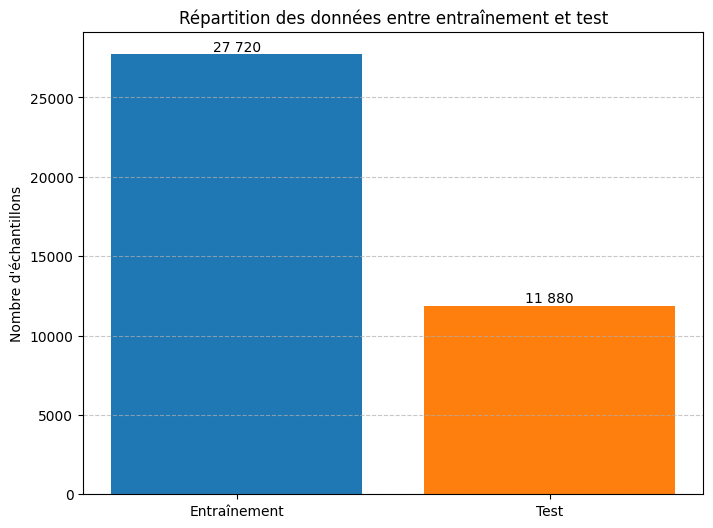


Détails de la répartition:
- Ensemble d'entraînement: 27720 échantillons (70.0%)
- Ensemble de test: 11880 échantillons (30.0%)


In [16]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Division des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Création du graphique
plt.figure(figsize=(8, 6))

# Diagramme en barres
bars = plt.bar(['Entraînement', 'Test'],
               [X_train.shape[0], X_test.shape[0]],
               color=['#1f77b4', '#ff7f0e'])

# Ajout des valeurs sur les barres
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:,}'.replace(',', ' '),
             ha='center', va='bottom')

# Personnalisation
plt.title('Répartition des données entre entraînement et test')
plt.ylabel('Nombre d\'échantillons')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

# Affichage texte complémentaire
print(f"\nDétails de la répartition:")
print(f"- Ensemble d'entraînement: {X_train.shape[0]} échantillons ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"- Ensemble de test: {X_test.shape[0]} échantillons ({X_test.shape[0]/len(X)*100:.1f}%)")

**6.3 - Construction du préprocesseur**:
         Nous créons un pipeline pour prétraiter les données numériques (normalisation) et
         catégorielles (encodage one-hot).

-Colonnes numériques : Standardisation après imputation des valeurs manquantes par la moyenne .

-Colonnes catégorielles : Encodage one-hot après imputation par le mode.
    


In [ ]:
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X.select_dtypes(include=['object']).columns

# Pipeline pour les variables numériques
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Pipeline pour les variables catégorielles
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combinaison des pipelines
preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_cols),
    ('cat', cat_pipeline, cat_cols)
])

# Application du prétraitement
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

print("\nPrétraitement terminé avec succès")


Prétraitement terminé avec succès


***Partie 7 : Construction et validation des modèles***

**7.1 - Définition des modèles et des hyperparamètres**

Nous utilisons 5 modèles de régression et définissons leurs hyperparamètres pour l'optimisation via GridSearchCV.

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor

# Configuration des modèles et hyperparamètres selon les spécifications du projet
model_config = {
    'LinearRegression': {
        'model': LinearRegression(),
        'params': {},
        'description': "Régression linéaire standard sans hyperparamètres à tuner"
    },
    'DecisionTree': {
        'model': DecisionTreeRegressor(random_state=42),
        'params': {
            'model__criterion': ['squared_error', 'absolute_error'],
            'model__max_depth': [None, 5, 6, 7, 10],
            'model__min_samples_split': [2, 3, 4, 5, 10]
        },
        'description': "Arbre de décision avec contrôle de la profondeur et split minimum"
    },
   'RandomForest': {
        'model': RandomForestRegressor(random_state=42),
        'params': {
            'model__n_estimators': [50, 100, 150],
            'model__criterion': ['squared_error'],
            'model__max_depth': [None, 10, 20]
        },
        'description': "Forêt aléatoire"
    },
    'GradientBoosting': {
        'model': GradientBoostingRegressor(random_state=42),
        'params': {
            'model__loss': ['squared_error', 'absolute_error'],
            'model__learning_rate': [0.01, 0.1, 0.2],
            'model__n_estimators': [100, 200, 300],
            'model__subsample': [0.5, 0.8, 1]
        },
        'description': "Gradient Boosting avec contrôle du taux d'apprentissage et subsampling"
    },
    'MLP': {
        'model': MLPRegressor(random_state=42, early_stopping=True),
        'params': {
            'model__hidden_layer_sizes': [(50,), (100,), (100, 50)],
            'model__activation': ['relu', 'tanh','logistic'],
            'model__solver': ['adam'],
            'model__alpha': [0.0001, 0.001 ,0.01],
            'model__learning_rate': ['constant', 'adaptive'],
            'model__learning_rate_init': [0.001, 0.01 ,0.1],
            'model__max_iter': [200, 300]
        },
        'description': "Réseau de neurones multicouches avec early stopping (config réduite)"
    }
}

# Affichage des configurations pour vérification
print("=== Configuration des modèles ===")
for nom, config in model_config.items():
    print(f"\nModèle: {nom}")
    print(f"Description: {config['description']}")
    print(f"Hyperparamètres: {config['params'] if config['params'] else 'Aucun'}")

=== Configuration des modèles ===

Modèle: LinearRegression
Description: Régression linéaire standard sans hyperparamètres à tuner
Hyperparamètres: Aucun

Modèle: DecisionTree
Description: Arbre de décision avec contrôle de la profondeur et split minimum
Hyperparamètres: {'model__criterion': ['squared_error', 'absolute_error'], 'model__max_depth': [None, 5, 6, 7, 10], 'model__min_samples_split': [2, 3, 4, 5, 10]}

Modèle: RandomForest
Description: Forêt aléatoire
Hyperparamètres: {'model__n_estimators': [50, 100, 150], 'model__criterion': ['squared_error'], 'model__max_depth': [None, 10, 20]}

Modèle: GradientBoosting
Description: Gradient Boosting avec contrôle du taux d'apprentissage et subsampling
Hyperparamètres: {'model__loss': ['squared_error', 'absolute_error'], 'model__learning_rate': [0.01, 0.1, 0.2], 'model__n_estimators': [100, 200, 300], 'model__subsample': [0.5, 0.8, 1]}

Modèle: MLP
Description: Réseau de neurones multicouches avec early stopping (config réduite)
Hyperpar

**7.2 - Entraînement et évaluation des modèles**

Nous entraînons chaque modèle avec une validation croisée et évaluons leurs performances.

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from joblib import dump
from scipy.stats import randint, uniform
from sklearn import config_context

# Dictionnaire pour stocker les résultats
resultats = {}

def train_and_evaluate_models(X_train, y_train, X_test, y_test):
    """
    Fonction optimisée pour entraîner et évaluer tous les modèles
    """
    for nom, config in model_config.items():
        print(f"\n=== Entraînement du modèle {nom} ===")
        print(f"Description: {config['description']}")

        try:
            # Création du pipeline
            pipeline = Pipeline([
                ('preprocessor', preprocessor),
                ('model', config['model'])
            ])

            # Stratégie de recherche adaptative
            if not config['params']:  # Pas d'hyperparamètres (LinearRegression)
                search = pipeline
                search.fit(X_train, y_train)
                best_params = {}
            else:
                total_combinations = np.prod([len(v) for v in config['params'].values()])

                # Choix de la méthode de recherche
                if total_combinations <= 25:  # Seuil ajustable
                    print(f"GridSearchCV ({total_combinations} combinaisons)")
                    search = GridSearchCV(
                        pipeline,
                        param_grid=config['params'],
                        cv=3,
                        scoring='r2',
                        n_jobs=4,
                        verbose=1
                    )
                else:
                    n_iter = min(40, total_combinations)  # Nombre d'itérations
                    print(f"RandomizedSearchCV ({n_iter} itérations sur {total_combinations} combinaisons)")
                    search = RandomizedSearchCV(
                        pipeline,
                        param_distributions=config['params'],
                        n_iter=n_iter,
                        cv=3,
                        scoring='r2',
                        n_jobs=4,
                        verbose=1,
                        random_state=42
                    )

                search.fit(X_train, y_train)
                best_params = search.best_params_

            # Évaluation
            y_pred = search.predict(X_test)

            # Stockage des résultats
            resultats[nom] = {
                'best_params': best_params,
                'best_score': search.best_score_ if hasattr(search, 'best_score_') else None,
                'mae': mean_absolute_error(y_test, y_pred),
                'rmse': np.sqrt(mean_squared_error(y_test, y_pred)),
                'r2': r2_score(y_test, y_pred),
                'model': search.best_estimator_ if hasattr(search, 'best_estimator_') else search
            }

            print(f"Terminé - R2: {resultats[nom]['r2']:.3f}")

        except Exception as e:
            print(f"Erreur avec {nom}: {str(e)}")
            resultats[nom] = None

    return resultats


def display_results(resultats):
    """
    Affiche les résultats de manière organisée
    """
    print("\n=== Résultats comparatifs ===")
    for nom, res in resultats.items():
        if res is not None:
            print(f"\nModèle {nom}:")
            print(f"- R2: {res['r2']:.3f}")
            print(f"- MAE: {res['mae']:.1f} DH")
            print(f"- RMSE: {res['rmse']:.1f} DH")
            print("- Meilleurs hyperparamètres:")
            for param, value in res['best_params'].items():
                print(f"  {param}: {value}")

def select_best_model(resultats):
    """
    Sélectionne et sauvegarde le meilleur modèle
    """
    meilleur_modele = None
    meilleur_score = -np.inf

    for nom, res in resultats.items():
        if res is not None and res['r2'] > meilleur_score:
            meilleur_score = res['r2']
            meilleur_modele = nom

    if meilleur_modele:
        print(f"\n=== Meilleur modèle: {meilleur_modele} avec R2 = {meilleur_score:.3f} ===")
        dump(resultats[meilleur_modele]['model'], 'meilleur_modele.joblib')
        print("Meilleur modèle sauvegardé dans 'meilleur_modele.joblib'")
        return resultats[meilleur_modele]['model']
    else:
        print("\nAucun modèle valide n'a pu être entraîné")
        return None

# Exécution du processus complet
resultats = train_and_evaluate_models(X_train, y_train, X_test, y_test)
display_results(resultats)
best_model = select_best_model(resultats)


=== Entraînement du modèle LinearRegression ===
Description: Régression linéaire standard sans hyperparamètres à tuner
Terminé - R2: 0.777

=== Entraînement du modèle DecisionTree ===
Description: Arbre de décision avec contrôle de la profondeur et split minimum
RandomizedSearchCV (40 itérations sur 50 combinaisons)
Fitting 3 folds for each of 40 candidates, totalling 120 fits
Terminé - R2: 0.847

=== Entraînement du modèle RandomForest ===
Description: Forêt aléatoire avec moins de combinaisons pour entraînement plus rapide
GridSearchCV (9 combinaisons)
Fitting 3 folds for each of 9 candidates, totalling 27 fits
Terminé - R2: 0.861

=== Entraînement du modèle GradientBoosting ===
Description: Gradient Boosting avec contrôle du taux d'apprentissage et subsampling
RandomizedSearchCV (40 itérations sur 54 combinaisons)
Fitting 3 folds for each of 40 candidates, totalling 120 fits
Terminé - R2: 0.871

=== Entraînement du modèle MLP ===
Description: Réseau de neurones multicouches avec ea

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:409: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.array(param_list)


Terminé - R2: 0.871

=== Résultats comparatifs ===

Modèle LinearRegression:
- R2: 0.777
- MAE: 4759.0 DH
- RMSE: 7032.9 DH
- Meilleurs hyperparamètres:

Modèle DecisionTree:
- R2: 0.847
- MAE: 3550.3 DH
- RMSE: 5822.8 DH
- Meilleurs hyperparamètres:
  model__min_samples_split: 2
  model__max_depth: 10
  model__criterion: absolute_error

Modèle RandomForest:
- R2: 0.861
- MAE: 3396.2 DH
- RMSE: 5552.3 DH
- Meilleurs hyperparamètres:
  model__criterion: squared_error
  model__max_depth: 10
  model__n_estimators: 100

Modèle GradientBoosting:
- R2: 0.871
- MAE: 3151.8 DH
- RMSE: 5340.5 DH
- Meilleurs hyperparamètres:
  model__subsample: 0.8
  model__n_estimators: 200
  model__loss: squared_error
  model__learning_rate: 0.2

Modèle MLP:
- R2: 0.871
- MAE: 3143.6 DH
- RMSE: 5337.1 DH
- Meilleurs hyperparamètres:
  model__solver: adam
  model__max_iter: 300
  model__learning_rate_init: 0.1
  model__learning_rate: constant
  model__hidden_layer_sizes: (50,)
  model__alpha: 0.0001
  model__ac

7.3 - Sélection du meilleur modèle

In [ ]:
# Filtrer les modèles valides
resultats_valides = {
    nom: infos for nom, infos in resultats.items()
    if infos is not None and 'r2' in infos
}

if resultats_valides:
    meilleur_modele_nom = max(resultats_valides, key=lambda x: resultats_valides[x]['r2'])
    meilleur_modele = resultats_valides[meilleur_modele_nom]['model']

    print(f"\nMeilleur modèle: {meilleur_modele_nom} avec R2 = {resultats_valides[meilleur_modele_nom]['r2']:.3f}")
else:
    print("Aucun modèle valide n'a été trouvé.")



Meilleur modèle: MLP avec R2 = 0.871


*Résultats attendus :*

Comparaison des performances des modèles (MAE, RMSE, R²).

Identification du modèle le plus performant .

**Partie 8 : Sauvegarde et déploiement**

*8.1 - Sauvegarde du modèle*

Nous sauvegardons le modèle optimisé pour une utilisation ultérieure.

In [ ]:
import os

import joblib

os.makedirs("model", exist_ok=True)

# Dans votre dossier model/
joblib.dump(meilleur_modele, "model/modele_selection.joblib")
print("Modèle sauvegardé sous model/modele_selection.joblib")


Modèle sauvegardé sous model/modele_selection.joblib


La ligne suivante dans un notebook Google Colab permet de télécharger un fichier depuis l'environnement Colab


In [ ]:
from google.colab import files
files.download('model/modele_selection.joblib')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Charger le modèle sauvegardé
modele_charge = joblib.load('model/modele_selection.joblib')


In [ ]:
!pip install fastapi uvicorn


 comparer les performances de plusieurs modèles de machine learning sur un jeu de test


Tableau Comparatif des Performances des Modèles sur l'Ensemble de Test:
                        r2          mae         rmse
MLP               0.871487  3143.638102  5337.088294
GradientBoosting  0.871323  3151.796185  5340.488018
RandomForest      0.860916  3396.165952  5552.250895
DecisionTree      0.847031  3550.306774  5822.798824
LinearRegression  0.776841  4759.038824  7032.948883


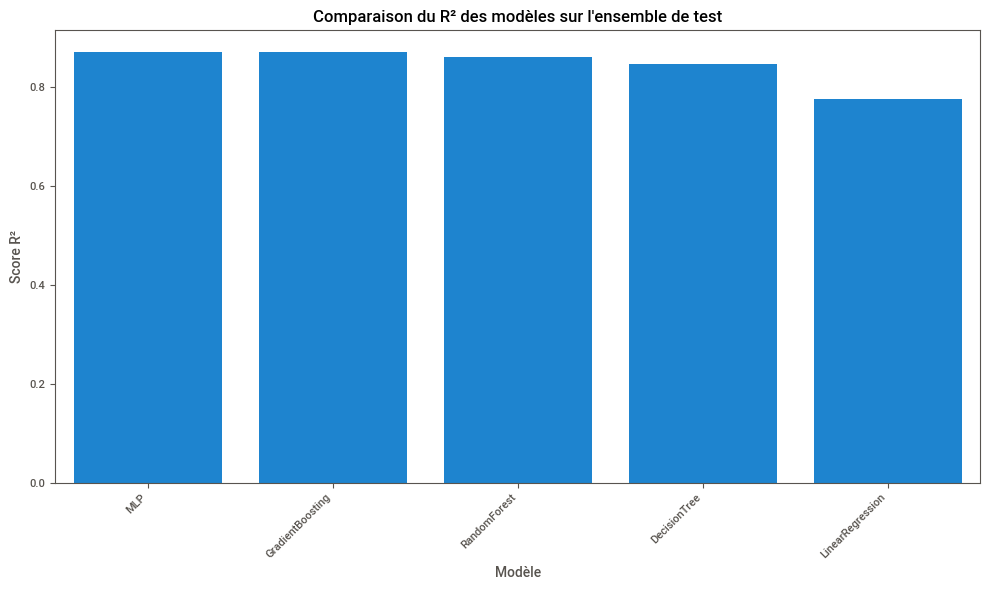


Le meilleur modèle identifié est : MLP
Score R² sur l'ensemble de test : 0.8715
MAE sur l'ensemble de test : 3143.64
RMSE sur l'ensemble de test : 5337.09
Meilleurs hyperparamètres trouvés : {'model__solver': 'adam', 'model__max_iter': 300, 'model__learning_rate_init': 0.1, 'model__learning_rate': 'constant', 'model__hidden_layer_sizes': (50,), 'model__alpha': 0.0001, 'model__activation': 'relu'}


In [ ]:
# Créer un DataFrame pour une meilleure visualisation
results_df = pd.DataFrame(resultats).T  # Transposer pour avoir les modèles en lignes
results_df = results_df[['r2', 'mae', 'rmse', 'best_score', 'best_params']] # Sélection et ordre des colonnes
results_df = results_df.sort_values(by='r2', ascending=False) # Trier par R2

print("\nTableau Comparatif des Performances des Modèles sur l'Ensemble de Test:")
print(results_df[['r2', 'mae', 'rmse']])

# Visualisation (optionnelle mais recommandée)
plt.figure(figsize=(10, 6))
sns.barplot(x=results_df.index, y=results_df['r2'])
plt.title('Comparaison du R² des modèles sur l\'ensemble de test')
plt.xlabel('Modèle')
plt.ylabel('Score R²')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print(f"\nLe meilleur modèle identifié est : {meilleur_modele_nom}")
print(f"Score R² sur l'ensemble de test : {resultats[meilleur_modele_nom]['r2']:.4f}")
print(f"MAE sur l'ensemble de test : {resultats[meilleur_modele_nom]['mae']:.2f}")
print(f"RMSE sur l'ensemble de test : {resultats[meilleur_modele_nom]['rmse']:.2f}")
print(f"Meilleurs hyperparamètres trouvés : {resultats[meilleur_modele_nom]['best_params']}")

évaluer visuellement les performances du meilleur modèle de machine learning en analysant :

 -La qualité des prédictions par rapport aux vraies valeurs

-La distribution des erreurs (résidus)

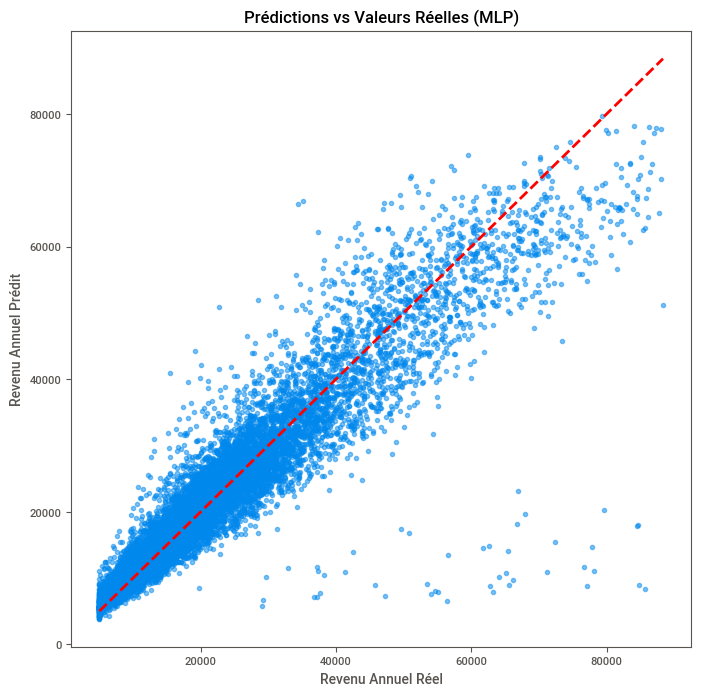

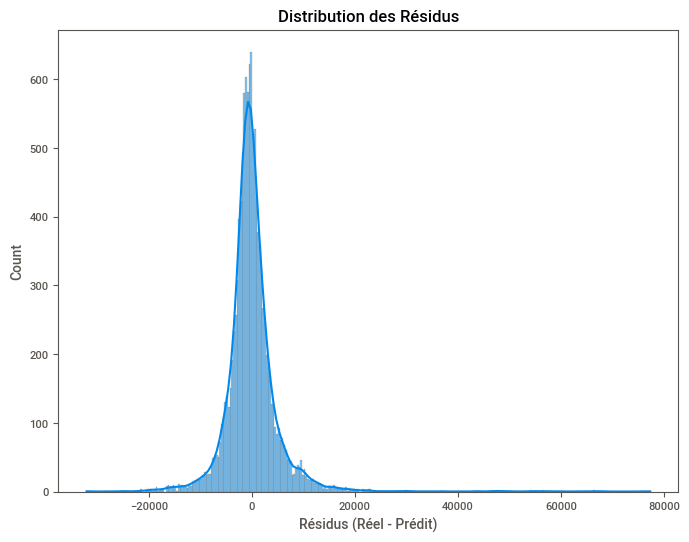

In [ ]:
# Prédictions du meilleur modèle sur le set de test
y_pred_best = meilleur_modele.predict(X_test)
residus = y_test - y_pred_best

# Graphique des prédictions vs valeurs réelles
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred_best, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel('Revenu Annuel Réel')
plt.ylabel('Revenu Annuel Prédit')
plt.title(f'Prédictions vs Valeurs Réelles ({meilleur_modele_nom})')
plt.show()

# Histogramme des résidus
plt.figure(figsize=(8, 6))
sns.histplot(residus, kde=True)
plt.xlabel('Résidus (Réel - Prédit)')
plt.title('Distribution des Résidus')
plt.show()

**observation**

la distribution des résidus, c'est-à-dire les différences entre les valeurs réelles et les valeurs prédites par le modèle MLP

"Un résidu de 0 signifie une prédiction parfaite"

In [ ]:
# Sauvegarder le meilleur modèle (pipeline complet)
nom_fichier_modele = 'modele_selection.joblib'
joblib.dump(meilleur_modele, nom_fichier_modele)

print(f"\nMeilleur modèle ({meilleur_modele_nom}) sauvegardé dans '{nom_fichier_modele}'")

# Vérifier le chargement (optionnel mais recommandé)
loaded_model = joblib.load(nom_fichier_modele)
print("\nModèle chargé avec succès.")
# Faire une prédiction test avec le modèle chargé
# print(loaded_model.predict(X_test.iloc[0:1])) # Prédit sur la première ligne de X_test


Meilleur modèle (MLP) sauvegardé dans 'modele_selection.joblib'

Modèle chargé avec succès.
